In [4]:
import urllib.request, urllib.error
slothlib_path = 'http://svn.sourceforge.jp/svnroot/slothlib/CSharp/Version1/SlothLib/NLP/Filter/StopWord/word/Japanese.txt'
slothlib_file = urllib.request.urlopen(slothlib_path)
slothlib_stopwords = [line.decode("utf-8").strip() for line in slothlib_file]
slothlib_stopwords = [ss for ss in slothlib_stopwords if not ss==u'']
import warnings
warnings.filterwarnings("ignore")
import spacy
nlp = spacy.load('ja_ginza')
from parse_5w1h import parse_5w1h
#テストファイル読み込み&下処理
path = "/Users/shota/Documents/itac/test_summary1.txt"
with open(path) as f:
    text = f.read()
text = '金曜日の朝、ケンタッキー州の工業団地で巨大な火事が発生し、当局が被害を封じ込めようと働いたため、その地域に濃い煙が噴出した。市の緊急管理機関のマイク・ワイマー氏によると、ルイビルのゼネラル・エレクトリック・アプライアンス・パークで午前7時少し前に火災が始まりました。 彼は、負傷者や閉じ込められた者の報告はないと言った。 ビデオは煙と明るいオレンジ色の炎の両方を示しました。 消防士は影響を受けた建物の周りの位置を取り、周辺から水を噴霧しました。 ワイマーは、当局が火災の原因を知らなかったとCNNに語り、少なくとも4つの警報が鳴った。 GEのWebサイトによると、ルイビルアプライアンスパークの施設は、米国の製造業を活性化しています。 公園は大きく、34のサッカー場が施設内の倉庫の1つに収まるようになっています。'
text = text.replace('\n','')

print(text)
doc = nlp(text)

金曜日の朝、ケンタッキー州の工業団地で巨大な火事が発生し、当局が被害を封じ込めようと働いたため、その地域に濃い煙が噴出した。市の緊急管理機関のマイク・ワイマー氏によると、ルイビルのゼネラル・エレクトリック・アプライアンス・パークで午前7時少し前に火災が始まりました。 彼は、負傷者や閉じ込められた者の報告はないと言った。 ビデオは煙と明るいオレンジ色の炎の両方を示しました。 消防士は影響を受けた建物の周りの位置を取り、周辺から水を噴霧しました。 ワイマーは、当局が火災の原因を知らなかったとCNNに語り、少なくとも4つの警報が鳴った。 GEのWebサイトによると、ルイビルアプライアンスパークの施設は、米国の製造業を活性化しています。 公園は大きく、34のサッカー場が施設内の倉庫の1つに収まるようになっています。


In [2]:
from parse_5w1h import parse_5w1h
parse = parse_5w1h(0)
parse.extract(text)
_5w1h = parse.display_5w1h()

金曜日の朝、ケンタッキー州の工業団地で巨大な火事が
Who


発生し、
How


当局が
Who


被害を
What


封じ込めようと働いた
How


ため、
Why


その地域に濃い
How


煙が
Who


噴出した。
How


市の緊急管理機関のマイク・
None


ワイマー氏によると、
How


ルイビルのゼネラル・エレクトリック・アプライアンス・
None


パークで午前7時
When


少し前に火災が
Who


始まりました。
How


彼は、負傷者や閉じ込められた者の報告は
Who


ないと言った。
How


ビデオは
Who


煙と明るいオレンジ色の炎の両方を
What


示しました。
How


消防士は
Who


影響を
What


受けた
How


建物の周りの位置を
What


取り、
How


周辺から水を
What


噴霧しました。
How


ワイマーは、
None


当局が
Who


火災の原因を
What


知らなかったとCNNに語り、少なくとも
How


4つの警報が
Who


鳴った。
How


GEのWebサイトによると、
How


ルイビルアプライアンスパークの施設は、
Who


米国の
Where


製造業を
What


活性化しています。
How


公園は
Who


大きく、
How


34のサッカー場が
Who


施設内の倉庫の1つに収まるようになっています。
How




In [20]:
from collections import defaultdict

# 1. 単語の頻度をカウント
word2freq = defaultdict(int)
word_list = []
for sent in doc.sents:
    word_list = [word.text for word in sent] 
    for word in set(word_list) :
            word2freq[word] += 1
print("語彙サイズ: %d" % len(word2freq.keys()))

語彙サイズ: 109


In [21]:
# 2. 語彙制限（高頻度な500単語に制限）

vocab = list()
for word, freq in sorted(word2freq.items(), key=lambda x: x[1], reverse=True)[:500]:
    vocab.append(word)
print("語彙サイズ: %d" % len(vocab))

語彙サイズ: 109


In [22]:
# 3. 各単語にIDを割り当てる

word2id = dict()
for word in vocab:
    word2id[word] = len(word2id)
print("単語 ケンタッキー州のID: %s" % word2id["ケンタッキー州"])

単語 ケンタッキー州のID: 27


In [23]:
# 2. TFIDFの計算
def tfidf(word, word_list, word2freq, n):
    return (word_list.count(word) / len(word_list)) * math.log(n / word2freq[word])

In [31]:
for phrase in _5w1h:
    word_list = [doc[i].text for i in range(phrase.start,phrase.end) ]
    print(word_list)
    print()
    print(phrase.end-phrase.start)

['金曜日', 'の', '朝', '、', 'ケンタッキー州', 'の', '工業', '団地', 'で', '巨大', 'な', '火事', 'が']

13
['発生', 'し', '、']

3
['当局', 'が']

2
['被害', 'を']

2
['封じ込めよう', 'と', '働い', 'た']

4
['ため', '、']

2
['その', '地域', 'に', '濃い']

4
['煙', 'が']

2
['噴出', 'し', 'た', '。']

4
['市', 'の', '緊急', '管理', '機関', 'の', 'マイク', '・']

8
['ワイマー', '氏', 'に', 'よる', 'と', '、']

6
['ルイビル', 'の', 'ゼネラル・エレクトリック', '・', 'アプライアンス', '・']

6
['パーク', 'で', '午前', '7', '時']

5
['少し', '前', 'に', '火災', 'が']

5
['始まり', 'まし', 'た', '。']

4
['彼', 'は', '、', '負傷者', 'や', '閉じ込め', 'られ', 'た', '者', 'の', '報告', 'は']

12
['ない', 'と', '言っ', 'た', '。']

5
['ビデオ', 'は']

2
['煙', 'と', '明るい', 'オレンジ', '色', 'の', '炎', 'の', '両方', 'を']

10
['示し', 'まし', 'た', '。']

4
['消防士', 'は']

2
['影響', 'を']

2
['受け', 'た']

2
['建物', 'の', '周り', 'の', '位置', 'を']

6
['取り', '、']

2
['周辺', 'から', '水', 'を']

4
['噴霧', 'し', 'まし', 'た', '。']

5
['ワイマー', 'は', '、']

3
['当局', 'が']

2
['火災', 'の', '原因', 'を']

4
['知ら', 'なかっ', 'た', 'と', 'CNN', 'に', '語り', '、', '少なく', 'とも']

10
['4', 'つ', 'の', '警報', 'が']

5
['鳴っ', '

In [1]:
# 3. BoWの重み付け
import math
import numpy as np
def tfidf_vectorize(phrase, vocab, word2id, word2df, n):
    vectors = list()
    
    word_list = [doc[i].text for i in range(phrase.start,phrase.end) ]
    vector = np.zeros(len(vocab))
    for word in word_list:
        if word in vocab:
            vector[word2id[word]] = tfidf(word, word_list, word2df, n)
    return vector

In [58]:
import networkx as nx
phrase_list = []
_5w1h_vectors = []
graph = nx.Graph()

node_id = 0
for phrase in _5w1h:
    if phrase.phrase not in phrase_list:
        phrase_list.append(phrase.phrase)
        graph.add_node(node_id)
        vector = tfidf_vectorize(phrase,vocab,word2id,word2freq, phrase.end-phrase.start) 
        _5w1h_vectors.append(vector)
        node_id += 1

In [59]:
# コサイン類似度の計算
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
        


In [60]:
def increment_edge (graph, node0, node1):
    print("link {} {}".format(node0, node1))
    
    if graph.has_edge(node0, node1):
        graph[node0][node1]["weight"] += 1.0
    else:
        graph.add_edge(node0, node1, weight=1.0)

In [83]:
#類似度が0以上の場合edgeで繋ぐ
for i, vector1 in enumerate(_5w1h_vectors[:-2]):
    for l,vector2 in enumerate(_5w1h_vectors[i+1:],i+1):
        if cos_sim(vector1,vector2) > 0.5:
            increment_edge(graph, i, l)

link 1 5
link 1 24
link 1 38
link 2 7
link 3 21
link 3 35
link 5 24
link 5 27
link 5 38
link 17 20
link 17 27
link 17 37
link 20 27
link 20 37
link 21 35
link 24 27
link 24 38
link 27 37
link 27 38


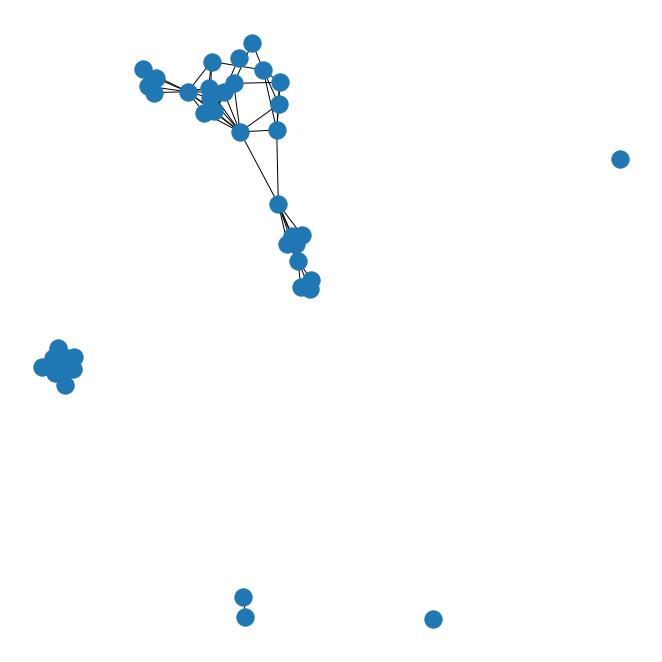

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(graph)

nx.draw(graph, pos=pos, with_labels=False, font_weight="bold")

In [85]:
ranks = nx.pagerank(graph)

In [86]:
for node_id, rank in sorted(ranks.items(), key=lambda x: x[1], reverse=True):
    print(rank, phrase_list[node_id])

0.04572226684876301 火災の原因を
0.04556802302777704 ワイマーは、
0.03193081634239107 被害を
0.03193081634239107 影響を
0.03193081634239107 製造業を
0.031211673505058796 ルイビルアプライアンスパークの施設は、
0.03104911608878921 ルイビルのゼネラル・エレクトリック・アプライアンス・
0.03057624100414514 ため、
0.030576241004145136 取り、
0.030576241004145136 大きく、
0.03039145479623613 米国の
0.02998754228052303 鳴った。
0.028400337192681077 GEのWebサイトによると、
0.028248432399350057 噴出した。
0.02824843239935005 噴霧しました。
0.026510340336753604 受けた
0.026508856100207118 始まりました。
0.026508856100207118 ないと言った。
0.026508856100207118 示しました。
0.026041437587476058 4つの警報が
0.026041437587476055 34のサッカー場が
0.02544529262086514 当局が
0.02544529262086514 煙が
0.025166886763435207 発生し、
0.02344228808897333 建物の周りの位置を
0.022269975096481338 金曜日の朝、ケンタッキー州の工業団地で巨大な火事が
0.02221176909444731 ビデオは
0.02221176909444731 消防士は
0.02221176909444731 公園は
0.020077292741950418 ワイマー氏によると、
0.018251970810552822 封じ込めようと働いた
0.018234347060635273 活性化しています。
0.017169819391690308 知らなかったとCNNに語り、少なくとも
0.01593837360026673 周辺から水を
0.01557428938